# Anomaly Detection & Time Series

## Question 1:  What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer:

*   Anomaly detection is the process of identifying data points, events, or patterns that deviate significantly from normal behavior and may indicate problems such as fraud, faults, or attacks. It is widely used in domains like finance (fraud detection), cybersecurity (intrusion detection), healthcare (abnormal vitals), and manufacturing (faulty sensors).

*   What is anomaly detection?

    * Anomaly detection assumes there is some notion of “normal” behavior in the data and flags observations that do not fit that notion. Normal behavior can be learned statistically (e.g., mean and variance), via machine learning models (e.g., clustering, autoencoders, one-class SVM), or through business rules. Once “normal” is defined, any observation with low probability, large deviation, or poor model fit is treated as an anomaly.

    Point anomalies

    * Definition: A point anomaly (also called a global outlier) is a single data point that is very different from the rest of the data, regardless of context.

    * Example 1: In credit card transactions, if most purchases are between ₹500 and ₹5,000, a sudden transaction of ₹500,000 on the same card may be flagged as a point anomaly indicating potential fraud.

    * Example 2: In network monitoring, a sudden sharp spike in traffic volume at a particular timestamp, when typical traffic is steady, can be a point anomaly suggesting a possible denial-of-service attack.

    Contextual anomalies

    * Definition: A contextual anomaly is a data point that is unusual only in a specific context (time, location, user, season, etc.), even though its value might be normal in another context.

    * Example 1: A temperature of 30°C is normal in summer but anomalously high in winter for the same city; the same numeric value is anomalous only in the winter context.

    * Example 2: A login at 3:00 AM from a particular country might be normal for a globally distributed team, but for an employee who always logs in from India between 9 AM and 7 PM IST, that same login time and location can be a contextual anomaly indicating account compromise.

    Collective anomalies

    * Definition: A collective anomaly is a group (sequence or set) of data points that together form an anomalous pattern, even if each individual point may look normal on its own.

    * Example 1: In a transaction stream, 50 small transactions of ₹200 each within 2 minutes might be anomalous collectively, although each single transaction value is within the normal range; together they may indicate a bot or scripted fraud.

    * Example 2: In time-series sensor data from a machine, a specific pattern such as a gradual drift followed by oscillations over several minutes may indicate an impending failure; each reading alone is within tolerance, but the sequence as a whole forms a collective anomaly.

*   These three types (point, contextual, and collective) are fundamental because they guide the choice of features, model structure (static vs time-series vs sequence models), and evaluation strategy when designing anomaly detection systems.

## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Answer:

*   Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are all unsupervised anomaly detection methods, but they differ in how they define “outlierness” and in the data situations where they work best.

*   Isolation Forest
Approach:

    * Tree-based, ensemble method that randomly selects a feature and a split value to “isolate” points.

    * Anomalies tend to be isolated in fewer splits (shorter path length), so their average path length across trees is small and they get high anomaly scores.

    * Scales well to large, high-dimensional datasets and does not rely directly on density estimation.

    Best suited for:

    * Large tabular datasets with mostly global/point anomalies.

    * Mixed or high-dimensional features where distance/density methods become less reliable.

    * Situations where you want good performance with relatively low tuning effort (mainly number of trees and contamination).

*   DBSCAN (used for outliers)
Approach:

    * Density-based clustering; defines clusters as high-density regions and labels points not belonging to any cluster as noise/outliers.

    * Uses two key parameters: ε (radius) and min_samples (minimum points to form a dense region).

    * Naturally discovers clusters of arbitrary shape; outliers are those that lie in low-density regions and are not density-reachable from any core point.

    Best suited for:

    * Data where there are clear, dense clusters plus “noise” points you want to treat as anomalies.

    * Spatial or low to medium-dimensional data where a meaningful distance metric (often Euclidean) exists.

    * Cases where you care about discovering cluster structure and outliers together; less suitable when clusters have very different densities or in very high dimensions.

*   Local Outlier Factor (LOF)
Approach:

    * Density-based, nearest-neighbor method that compares the local density around a point to the densities of its neighbors.

    * Computes a “local outlier factor” score: points with substantially lower local density than their neighbors get high LOF scores and are flagged as local outliers.

    * Focuses on relative density, so it can detect anomalies in regions where global density is low or high.

    Best suited for:

    * Datasets with heterogeneous density, where “local” anomalies matter (e.g., a point that is sparse relative to its immediate neighborhood, even if that region is overall sparse).

    * Situations where you specifically care about subtle, local deviations rather than only obvious global outliers.

    * Small to medium datasets; LOF can be computationally heavy on very large datasets due to kNN distance calculations.

*   Practical comparison:

    * If we want a fast, general-purpose anomaly detector for large tabular data with mainly global/point anomalies → prefer Isolation Forest.

    * If we data naturally forms dense clusters with clear noise points, and you also want cluster labels → use DBSCAN and treat noise as anomalies.

    * If we anomalies are “local” relative to neighbors (e.g., varying densities, subtle local deviations) and dataset size is moderate → use LOF with carefully chosen k (number of neighbors).

## Question 3: What are the key components of a Time Series? Explain each with one example.


Answer:

*   A time series has a few standard components that together explain its overall pattern over time. The classic four are: trend, seasonality, cyclical variation, and irregular (random) component.

*   Trend

    * The trend is the long-term directional movement of the series (upward, downward, or roughly flat) over many periods.
    
    * For example, the monthly number of mobile data subscribers in a country typically shows an upward trend over several years as more people adopt smartphones.

*   Seasonality

    * Seasonality is a repeating, predictable pattern that occurs at fixed, known intervals such as daily, weekly, monthly, or yearly.
    
    * For example, ice-cream sales often spike every summer and drop in winter each year, creating a clear seasonal pattern in monthly sales data.

*   Cyclical component

    * The cyclical component consists of up and down movements that occur over longer, irregular periods, often linked to economic or business cycles rather than fixed seasons.
    
    * For example, a country's quarterly GDP may rise during an expansion phase and fall during a recession over several years, forming a cycle that is not strictly annual.

*   Irregular (random) component

    * The irregular component (also called random or noise) captures unpredictable, short-term fluctuations that cannot be explained by trend, seasonality, or cycles.
    
    * For example, daily stock prices may suddenly drop due to an unexpected political event or company-specific news, creating random shocks in the time series.

## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:


*   A time series is called stationary if its statistical properties do not change over time. Specifically, in a stationary series:

    * The mean (average) is constant over time; there is no increasing or decreasing trend.

    * The variance (spread or volatility) is constant over time.

    * The autocovariance (relationship between values at different times) depends only on the time gap (lag), not on the actual time.

*   A time series with a changing trend, seasonality, or changing variance is generally non-stationary.

*   To test if a time series is stationary:

    Visual inspection:

    * Plot the series and look for obvious trends or seasonality.

    * Plot rolling mean and rolling standard deviation over time. If these change, the series is likely non-stationary.

    Statistical tests:

    Augmented Dickey-Fuller (ADF) test:

    * Null hypothesis: series has a unit root (non-stationary).

    * If p-value is small and the test statistic is less than the critical value, reject the null hypothesis and conclude stationarity.

    KPSS test:

    * Null hypothesis: series is stationary.

    * If p-value is small, reject the null and conclude non-stationarity.

*   Using both tests together helps make a robust conclusion.

*   To transform a non-stationary series into a stationary one, we can apply:

    Differencing:

    * First-order differencing: subtract the previous value from the current value:
      
      Y't = Y_t - Y(t-1)

    * Seasonal differencing: subtract the value from the same season in the previous cycle:
      
      Y't = Y_t - Y(t-s),
      
      where s is the season length (e.g., 12 for monthly data with yearly seasonality).

    Detrending:

    * Fit and subtract a trend line from the series to remove systematic increases or decreases.

    Variance stabilizing transforms:

    * Apply a function like log, square root, or Box-Cox to reduce changing variance before differencing.

    Seasonal adjustment:

    * Remove the seasonal component using decomposition methods, making the residual series stationary.

## Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer:


The below is the comparison of AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of their structure and application:

1. AR (Autoregressive) Model

    * Structure:
    
      Models current value as a linear combination of previous values plus noise.

    * Formula example:
    
      Y_t = c + phi_1 * Y_(t-1) + phi_2 * Y_(t-2) + ... + error_t

    * Application:
    
      Suitable when past values strongly predict current values; works well for stationary time series with autocorrelation.

2. MA (Moving Average) Model

    * Structure:
      
      Models current value as a linear combination of past error terms (shocks).

    * Formula example:
    
      Y_t = c + error_t + theta_1 * error_(t-1) + theta_2 * error_(t-2) + ...

    * Application:
    
      Captures short-term noise effects; useful when error terms are correlated over time.

3. ARIMA (Autoregressive Integrated Moving Average)

    * Structure:
    
      Combines AR and MA with differencing (Integration) to make a non-stationary series stationary.

    * Components:

      AR(p): autoregressive part with order p

      I(d): differencing order d to remove trend/non-stationarity

      MA(q): moving average part with order q

    * Application:
    
      Most widely used for univariate time series that contain trends or non-stationarity but no seasonal pattern.

4. SARIMA (Seasonal ARIMA)

    * Structure:
    
      Extends ARIMA by adding seasonal terms for handling seasonality.

    * Seasonal components:

      Seasonal AR(P), I(D), MA(Q) with seasonal period s (e.g., s=12 for monthly data with yearly seasonality)

    * Model order notation:
    
      (p,d,q) x (P,D,Q,s)

    * Application:
    
      Best for time series with both trend and seasonality, such as monthly retail sales with yearly seasonal cycles.

5. SARIMAX (Seasonal ARIMA with eXogenous variables)

    * Structure:
    
      Extends SARIMA by including exogenous (external) regressors X that influence the series.

    * Allows modeling the impact of outside variables alongside time series components.

    * Application:
    
      Used when external factors (like promotions, temperature, economic indicators) affect the series, improving forecasting accuracy.

*   In shot:

    * Use AR or MA when data is stationary and model relationships are simple.

    * Use ARIMA for non-stationary, non-seasonal series.

    * Use SARIMA when seasonality is important.

    * Use SARIMAX when you need to include external variables.

## Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

Answer:




In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset CSV
data = pd.read_csv('https://drive.google.com/uc?action=download&id=1U2ZuXX4EMtXT7fk9MmupS9fKR0EuCz4e', parse_dates=['Month'], index_col='Month')
data.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


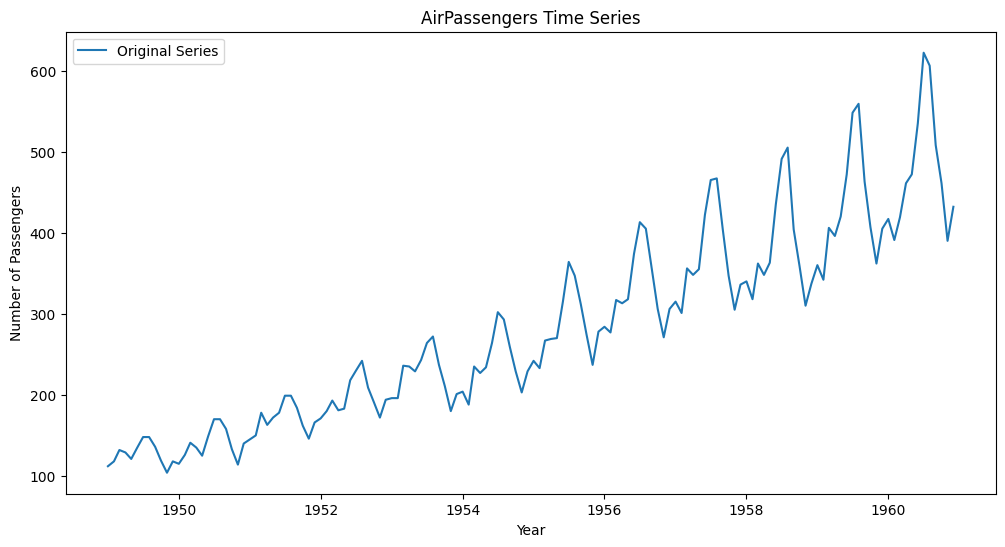

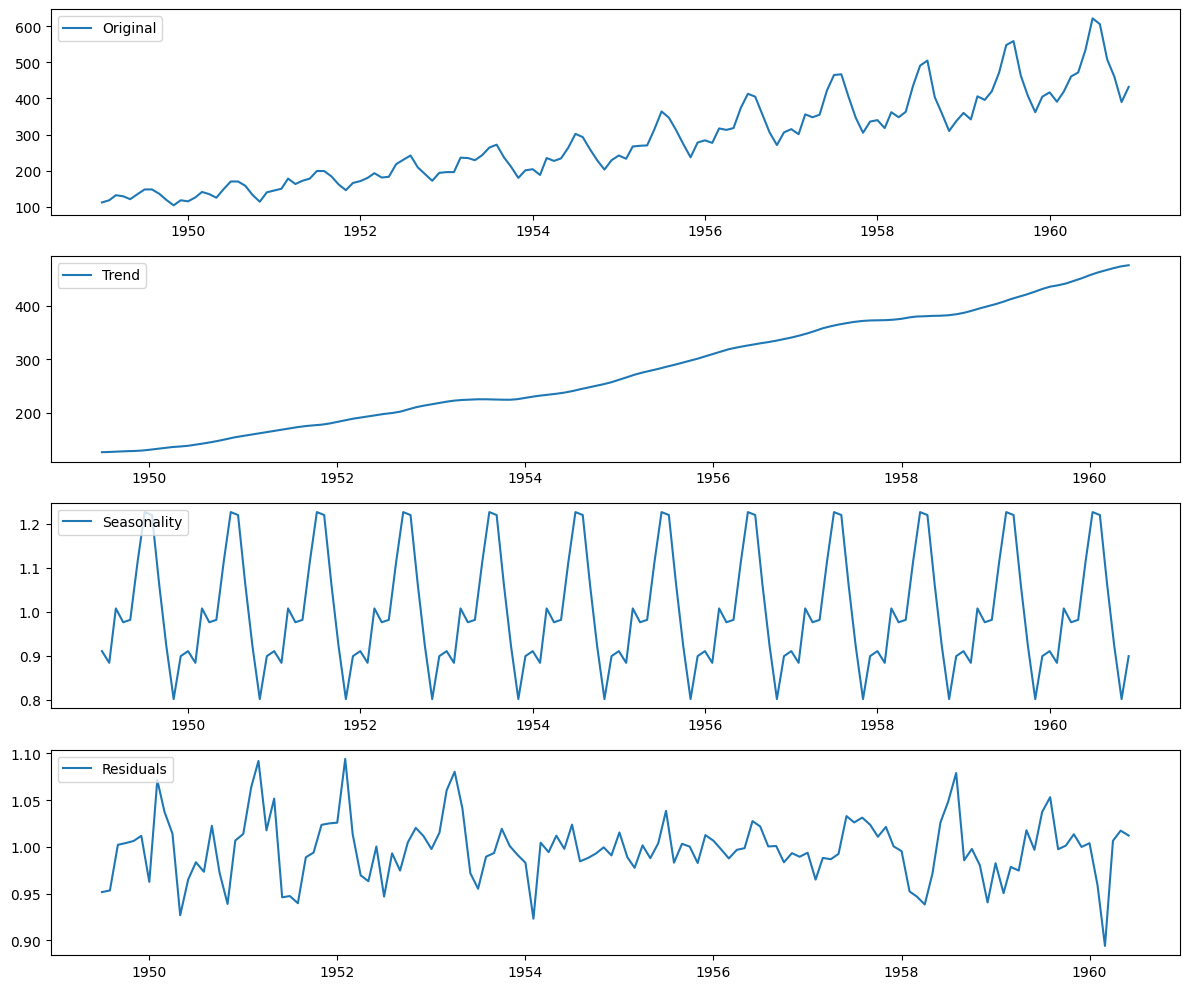

In [9]:
# Plot original time series
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose time series with a period of 12 months
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(data['Passengers'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

Answer:

In [21]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

file = 'nyc_taxi_fare_data.csv'
gdown.download('https://drive.google.com/uc?id=1UvuySwLlkS2bicXY3A6cp1T54M9hmzu_', file, quiet=False)
# Loading NYC Taxi Fare data
data = pd.read_csv(file)
data

Downloading...
From (original): https://drive.google.com/uc?id=1UvuySwLlkS2bicXY3A6cp1T54M9hmzu_
From (redirected): https://drive.google.com/uc?id=1UvuySwLlkS2bicXY3A6cp1T54M9hmzu_&confirm=t&uuid=c68fc889-bc82-4322-b87d-ef063d45b30d
To: /content/nyc_taxi_fare_data.csv
100%|██████████| 594M/594M [00:11<00:00, 53.7MB/s]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


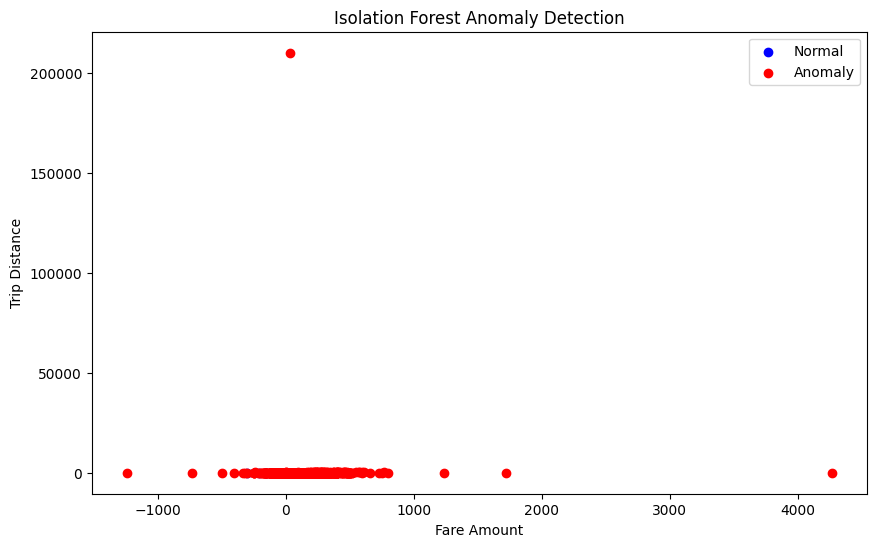

In [22]:
# Select numerical features for anomaly detection, for example:
X = data[['fare_amount', 'trip_distance']]

# Instantiate and fit Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies
data['anomaly'] = model.predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(data.loc[data['anomaly'] == 1, 'fare_amount'], data.loc[data['anomaly'] == 1, 'trip_distance'],
            c='blue', label='Normal')
plt.scatter(data.loc[data['anomaly'] == -1, 'fare_amount'], data.loc[data['anomaly'] == -1, 'trip_distance'],
            c='red', label='Anomaly')
plt.xlabel('Fare Amount')
plt.ylabel('Trip Distance')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()

## Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

Answer:

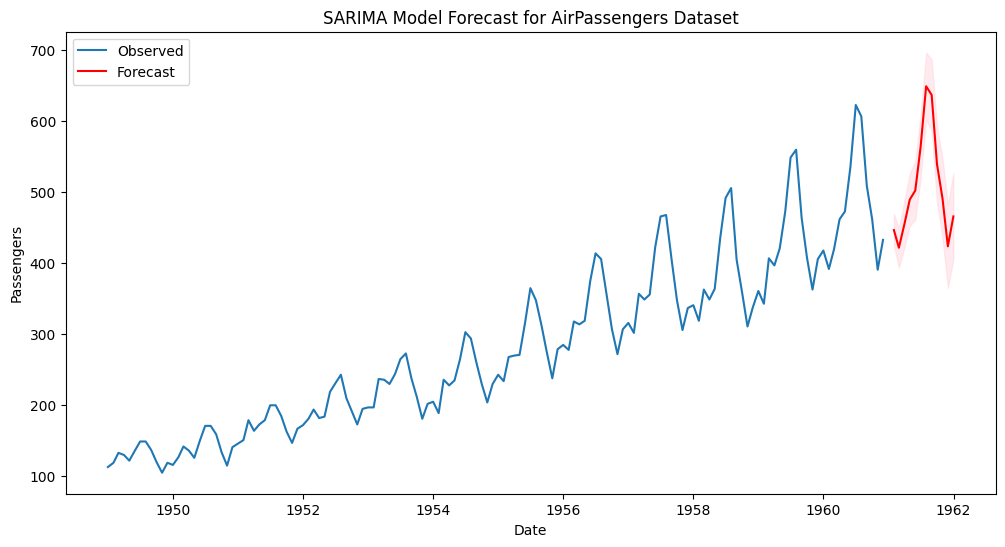

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Load AirPassengers dataset CSV
data = pd.read_csv('https://drive.google.com/uc?action=download&id=1U2ZuXX4EMtXT7fk9MmupS9fKR0EuCz4e', parse_dates=['Month'], index_col='Month')
data.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

# Define SARIMA orders
sarima_order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 0, 12)  # P, D, Q, seasonal_period

# Fit the SARIMA model
model = SARIMAX(data['Passengers'], order=sarima_order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast the next 12 months
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')

# Extract predicted means and confidence intervals
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()

# Plot historical data and forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast for AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

Answer:

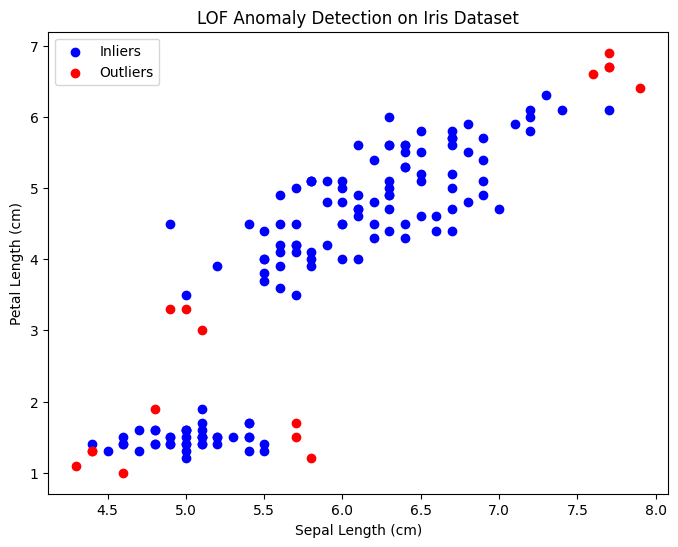

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading numeric iris dataset
iris = load_iris()
# Selecting two features: sepal length and petal length
X = iris.data[:, [0, 2]]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Visualization: Blue for inlier, red for outlier
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='b', label='Inliers')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='r', label='Outliers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.title('LOF Anomaly Detection on Iris Dataset')
plt.show()

## Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:
##● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
##● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
##● How would you validate and monitor the performance over time?
##● How would this solution help business decisions or operations?


Answer:

*   For real-time power grid monitoring, a robust data science workflow combines anomaly detection with short-term forecasting using streaming data.

*   Real-Time Anomaly Detection

    * Use scalable algorithms such as Isolation Forest, Local Outlier Factor (LOF), or DBSCAN to promptly highlight abnormal spikes or drops in energy consumption.

    * Isolation Forest and LOF work well with streaming data due to their efficiency and ability to flag both global and local anomalies. Isolation Forest is particularly good for numerical features like energy usage, temperature, and weather variables, while LOF captures local density shifts that traditional algorithms can miss.

    * DBSCAN can uncover clusters of abnormal events, especially when combined with real-time dimensionality reduction on features (region, weather, usage) for spatially distributed grids.

*   Short-Term Forecasting Models

    * Use SARIMAX for short-term forecasting because it effectively models seasonality, trends, and can incorporate exogenous variables (like weather conditions and region) directly.

    * If region and weather conditions strongly influence demand, SARIMAX allows you to account for these effects, unlike simpler ARIMA or SARIMA models.

    * Fit and update the SARIMAX model periodically with the most recent streaming data (every few hours or daily) for accurate short-term forecasts.

*   Validation and Monitoring Over Time

    * Continuously validate forecast accuracy using metrics such as MAE, RMSE, and MASE on rolling time windows.

    * For anomaly detection, periodically compare flagged anomalies against incident reports or operational logs—calculate precision, recall, and look at false positive/negative rates.

    * Use automated dashboarding for near real-time visualization and alerting. Set up retraining triggers if drift or model degradation is detected in sliding windows.

*   Business Impact and Operational Value

    * Enables grid operators to anticipate demand surges and drops, optimizing energy resource allocation and preventing outages or over-generation.

    * Supports rapid operational response: anomaly detection can trigger alarms for grid faults, fraud, or unusual consumption patterns, reducing downtime and improving reliability.

    * Insights into weather and regional influence on demand allow for proactive load balancing and infrastructure planning—improving efficiency and reducing costs.

    * Near real-time analytics supports both tactical responses (alerts, redispatches) and strategic decisions (planning, investments).

*   A workflow combining real-time anomaly detection and accurate demand forecasting empowers smarter operations, incident prevention, and strategic planning for the power grid.